In [56]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [28]:
housing = fetch_california_housing()
print("housing.keys():\n", housing.keys())
xTrain, xTest, yTrain, yTest = train_test_split(
    housing.data, housing.target, random_state=66)
lr = LinearRegression().fit(xTrain, yTrain)

housing.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [29]:
print("Training set score: {:.2f}".format(lr.score(xTrain, yTrain)))
print("Test set score: {:.2f}".format(lr.score(xTest, yTest)))

Training set score: 0.60
Test set score: 0.61


In [35]:
ch_dataframe = pd.DataFrame(xTrain, columns=housing.feature_names)
display(ch_dataframe)

ch_dataframe = pd.DataFrame(xTest, columns=housing.feature_names)
display(ch_dataframe)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.2260,52.0,5.011765,1.091176,663.0,1.950000,37.77,-122.26
1,4.2263,21.0,6.560694,1.080925,2834.0,3.276301,33.94,-117.53
2,1.8771,34.0,2.578351,1.079381,3326.0,3.428866,34.08,-118.30
3,3.3482,41.0,4.078947,1.052632,711.0,2.338816,34.03,-118.45
4,3.2120,13.0,5.660194,1.072816,1412.0,2.284790,33.04,-117.24
...,...,...,...,...,...,...,...,...
15475,6.2971,13.0,6.250000,1.006944,1799.0,3.123264,34.42,-118.43
15476,1.4329,21.0,3.057762,1.003610,1283.0,4.631769,33.93,-118.28
15477,7.4863,23.0,6.585023,1.046802,1782.0,2.780031,37.33,-122.03
15478,2.0769,17.0,3.941667,1.211111,1300.0,3.611111,33.78,-118.18


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,5.0629,23.0,5.738117,1.052190,2817.0,2.625349,33.84,-117.84
1,2.6343,14.0,4.696309,1.036913,2294.0,3.848993,37.73,-120.93
2,3.9118,46.0,4.868526,0.940239,819.0,3.262948,37.96,-122.33
3,3.5750,52.0,4.843505,1.067293,1269.0,1.985915,37.77,-122.45
4,3.9615,36.0,5.964602,1.004425,1192.0,2.637168,34.70,-118.15
...,...,...,...,...,...,...,...,...
5155,2.9519,43.0,4.189655,0.988506,935.0,5.373563,34.26,-118.43
5156,2.8750,44.0,5.393333,1.033333,667.0,2.223333,35.37,-119.04
5157,5.0479,22.0,5.135878,1.054962,3783.0,2.887786,37.63,-122.46
5158,2.8679,44.0,4.951555,1.145336,3269.0,2.363702,37.75,-122.40


In [31]:
ridge = Ridge().fit(xTrain, yTrain)
print("Training set score: {:.10f}".format(ridge.score(xTrain, yTrain)))
print("Test set score: {:.10f}".format(ridge.score(xTest, yTest)))

Training set score: 0.6032623773
Test set score: 0.6091382628


In [48]:
ridge10 = Ridge(alpha=10).fit(xTrain, yTrain)
print("Training set score: {:.10f}".format(ridge10.score(xTrain, yTrain)))
print("Test set score: {:.10f}".format(ridge10.score(xTest, yTest)))

Training set score: 0.6032577625
Test set score: 0.6091101576


In [50]:
ridge01 = Ridge(alpha=0.1).fit(xTrain, yTrain)
print("Training set score: {:.2f}".format(ridge01.score(xTrain, yTrain)))
print("Test set score: {:.2f}".format(ridge01.score(xTest, yTest)))

Training set score: 0.60
Test set score: 0.61


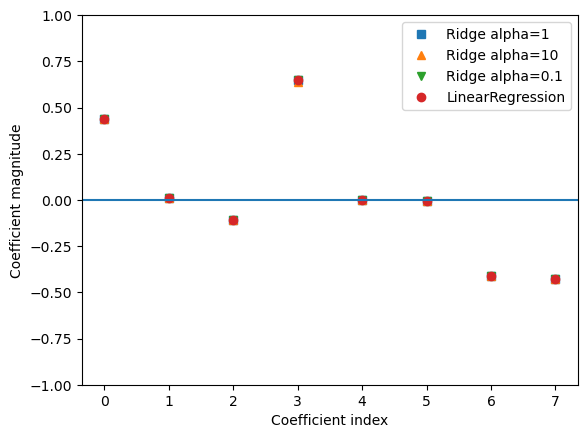

In [61]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-1, 1)
plt.legend()

In [63]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(xTrain, yTrain)
print("Training set score: {:.2f}".format(lasso.score(xTrain, yTrain)))
print("Test set score: {:.2f}".format(lasso.score(xTest, yTest)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.27
Test set score: 0.29
Number of features used: 3


In [73]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(xTrain, yTrain)
print("Training set score: {:.2f}".format(lasso001.score(xTrain, yTrain)))
print("Test set score: {:.2f}".format(lasso001.score(xTest, yTest)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.60
Test set score: 0.61
Number of features used: 8
